# WITH PANDAS AND MATPLOTLIB

In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [109]:
kill.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


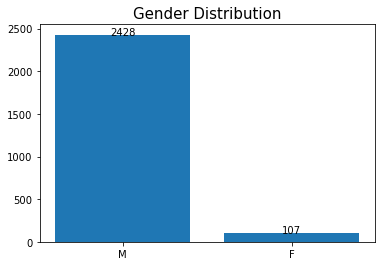

In [110]:
# solution-1

bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})
p = range(len(bars))

for i in range(len(bars)):
    plt.text(x=p[i], y=bars[i], s=bars[i], ha='center', size=10)

plt.show()

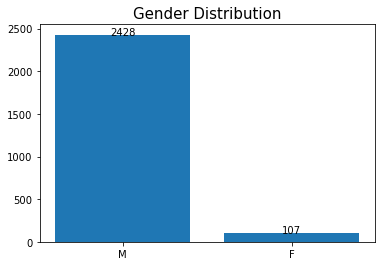

In [111]:
# solution-2

bars = kill['gender'].value_counts()
positions = kill['gender'].unique()
plt.bar(positions, bars)
plt.title('Gender Distribution', fontdict={'fontsize':15})

plt.text(x=0, y = bars[0], s = bars[0], ha="center")
plt.text(x=1, y = bars[1], s = bars[1], ha="center")
plt.show()

## 2: Plot 7 most common kill weapons

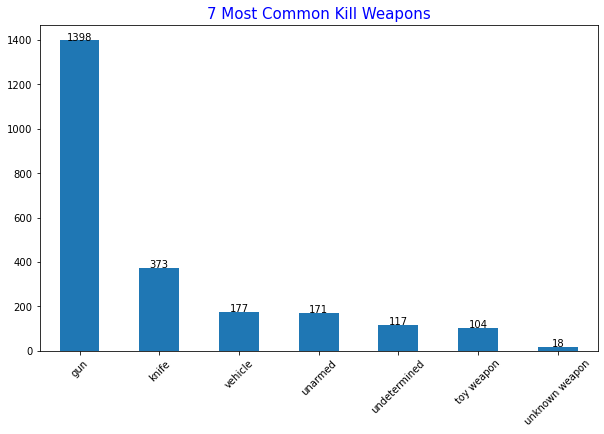

In [112]:
a = kill["armed"].value_counts().head(7)

plt.figure(figsize=(10, 6))
a.plot(kind="bar")
plt.title("7 Most Common Kill Weapons", color="b" , fontsize=15)
p = range(len(a))

for i in range(len(a)):
    plt.text(x=p[i], y=a[i], s=a[i], ha='center', size=10)
    
    
plt.xticks(rotation =45)
plt.show()


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [113]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [3]:
kill["age_cat"]= kill["age"].apply(lambda x : "above25" if x > 25 else "below25")

In [4]:
kill["age_cat"].value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

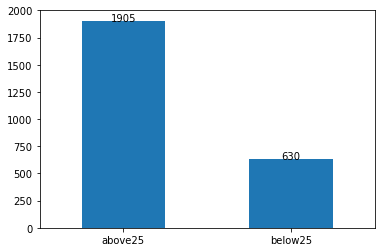

In [5]:
a = kill["age_cat"].value_counts()
a.plot.bar();

plt.xticks(rotation=0)
p = range(len(a))

for i in range(len(a)):
    plt.text(x=p[i], y=a[i], s=a[i], ha='center', size=10)
plt.show()

## 4: Plot number of killed poeple by race

In [117]:
 kill["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

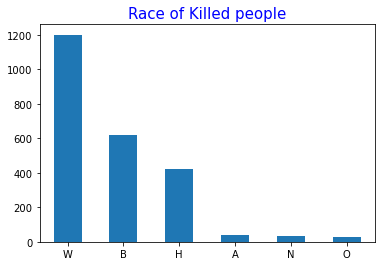

In [118]:
kill["race"].value_counts().plot.bar()
plt.title("Race of Killed people", color="b" , fontsize=15)
plt.xticks(rotation =0)
plt.show()

## 5: Killed People According to Races (Pie Chart)

In [119]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [120]:
np.array (kill["race"].value_counts().index)

array(['W', 'B', 'H', 'A', 'N', 'O'], dtype=object)

In [121]:
kill["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [6]:
kill.dropna(inplace=True)

In [7]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [8]:
kill["race"].value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [9]:
a = kill["race"].value_counts().index
a


Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [126]:
b = kill["race"].value_counts().values
b


array([1168,  592,  401,   36,   29,   28], dtype=int64)

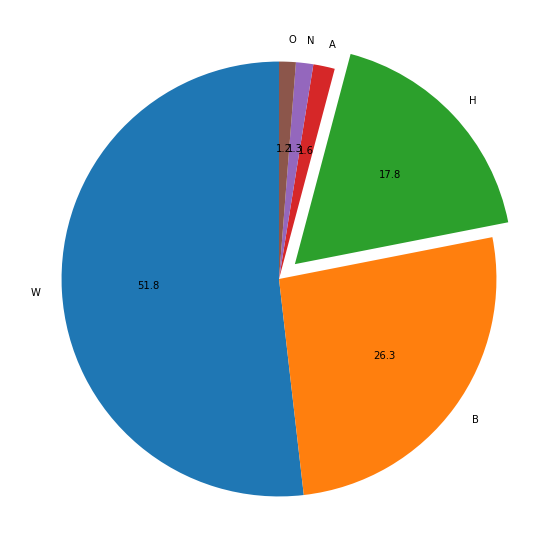

In [127]:
e =(0, 0, 0.1, 0, 0, 0)

plt.figure(figsize=(12,10))
plt.pie(b, labels = a,  explode = e, autopct='%.1f',startangle=90 )

plt.show()

# Most common 15 Name or Surname of killed people


In [29]:
kill["name"].value_counts().head(15)

name                    
Michael Brown               2
Daquan Antonio Westbrook    2
Michael Johnson             2
Brandon Jones               2
Eric Harris                 2
 Austin Wilburly  Reid      1
Matthew Wayne McDaniel      1
Matthew Quinn               1
Matthew Ryan Graham         1
Matthew Vincent Wood        1
Matthew Watson              1
Maurico Barron              1
Matthew Zank                1
Matthew Lundy               1
Mauro Garnica               1
dtype: int64

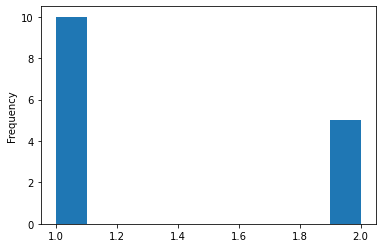

In [37]:
kill["name"].value_counts().head(15).plot.hist();

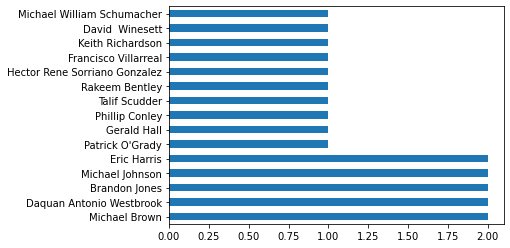

In [38]:
kill["name"].value_counts().head(15).plot.barh();